In [191]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [192]:
from sklearn.svm import SVC
from sklearn import datasets

filename = '/Users/roberto/data/RO-logging/datasets/ro-dataset-v2/maxEVecs-ro-dataset.csv';
print('Reading from: ' + filename)
df_maxEVecs = pd.read_csv(filename, names=range(2400))

[m,n] = shape(df_maxEVecs)

filename = '/Users/roberto/data/RO-logging/datasets/ro-dataset-v2/labels-ro-dataset.csv';
print('Reading from: ' + filename)
df_labels = pd.read_csv(filename, names=range(m))
labels = np.copy(df_labels.values)
labels = labels.T
print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))

Reading from: /Users/roberto/data/RO-logging/datasets/ro-dataset-v2/maxEVecs-ro-dataset.csv
Reading from: /Users/roberto/data/RO-logging/datasets/ro-dataset-v2/labels-ro-dataset.csv
Shape of max eigenvecs is:
 (4713, 2400)
Shape of labels is:
 (1, 4713)


In [193]:
where_are_NaNs = isnan(df_maxEVecs)
df_maxEVecs[where_are_NaNs] = 0
df_maxEVecs.head()

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.055188,0.055134,0.054691,0.054660,0.054297,0.054235,0.054081,0.053936,0.053916,0.053564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048261,0.048193,0.047930,0.047750,0.047725,0.047575,0.047533,0.046977,0.046955,0.046932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046782,0.046761,0.046703,0.046670,0.046650,0.046623,0.046605,0.046600,0.046530,0.046512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048621,0.048156,0.047899,0.047863,0.047810,0.047751,0.047556,0.047522,0.047419,0.047178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.046599,0.046410,0.046399,0.046352,0.046250,0.046162,0.046136,0.045981,0.045935,0.045744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# Handcrafted features for all data (train and test data)
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)

q1_vals = []
q3_vals = []
iqr_vals = []
for i in range(m):
    q1_index = int(round(num_landmarks[i]/4))
    q1_vals.append(eigenvectors[i,q1_index])
    q3_index = int(round(num_landmarks[i]*3/4))
    q3_vals.append(eigenvectors[i,q3_index])
    iqr_vals.append(q1_vals[-1]-q3_vals[-1])
#     plt.plot([0,q1_index,q3_index],[max_vals[i],q1_vals[i],q3_vals[i]])

In [195]:
temp_dict = {'max_vals':max_vals,'num_landmarks':num_landmarks,
             'q1_vals':q1_vals,'q3_vals':q3_vals,'iqr_vals':iqr_vals}
df_features = pd.DataFrame(data = temp_dict)
df_features.head()

,max_vals,num_landmarks,q1_vals,q3_vals,iqr_vals
0,0.055188,663,0.046111,0.033737,0.012374
1,0.048261,706,0.044135,0.031890,0.012245
2,0.046782,706,0.043315,0.033971,0.009344
3,0.048621,696,0.042926,0.034219,0.008707
4,0.046599,650,0.042656,0.037696,0.004960


In [196]:
print(num_landmarks[0])
print(np.count_nonzero(eigenvectors[0,0:1800],axis=0))

663
663


In [197]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Good RO: ',np.count_nonzero(labels==0))
print('Bad RO:',np.count_nonzero(labels==1),'\n')

X_total = np.copy(df_features.values)
y_total = np.copy(ravel(labels))

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=0)

for train_index, test_index in sss.split(X_total, y_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    eig_train, eig_test = df_maxEVecs.values[train_index], df_maxEVecs.values[test_index]

print('Good vs Bad RO in training: ',np.count_nonzero(y_train==0),'good,',np.count_nonzero(y_train==1),'bad')
print('Good vs Bad RO in testing:',np.count_nonzero(y_test==0),'good,',np.count_nonzero(y_test==1),'bad \n')

print('Good/Bad ratio in training: ',np.count_nonzero(y_train==0)/np.count_nonzero(y_train==1))
print('Good/Bad ratio in testing:',np.count_nonzero(y_test==0)/np.count_nonzero(y_test==1),'\n')

# print('Bad RO % in training: ',np.count_nonzero(y_train==1)/np.count_nonzero(labels==1))
# print('Bad RO % in testing:',np.count_nonzero(y_test==1)/np.count_nonzero(labels==1),'\n')

print('Bad RO % in training: ',np.count_nonzero(y_train==1)/len(y_train))
print('Bad RO % in testing:',np.count_nonzero(y_test==1)/len(y_test),'\n')

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Good RO:  4054
Bad RO: 659 

Good vs Bad RO in training:  3243 good, 527 bad
Good vs Bad RO in testing: 811 good, 132 bad 

Good/Bad ratio in training:  6.15370018975332
Good/Bad ratio in testing: 6.143939393939394 

Bad RO % in training:  0.13978779840848807
Bad RO % in testing: 0.13997879109225875 

Size of training data is: 
 (3770, 5)
Size of test data is: 
 (943, 5)


In [240]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
print("Mean: ",X_scaled.mean(axis=0))
print("Variance: ",X_scaled.std(axis=0))

Mean:  [ 4.78613612e-15  1.32752636e-15  3.92553658e-15  9.92132989e-15
 -4.71064390e-16]
Variance:  [1. 1. 1. 1. 1.]


In [241]:
X_train = scaler.transform(X_train)

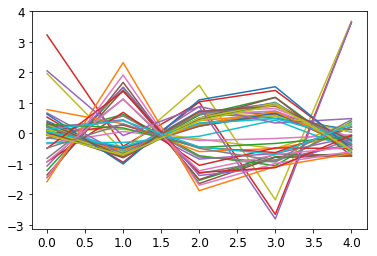

In [242]:
plt.plot(X_train[0:50,:].T,'-');

In [243]:
label_colours = []   
test_colours = []
for i in range(m_train):
    if(y_train[i] == 1):
        label_colours.append('red')
    else:
        label_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        test_colours.append('red')
    else:
        test_colours.append('blue')

# plt.figure(figsize=(15,5))

# for i in range(m_train):
#     plt.subplot(121)
#     plt.plot(eig_train[i,:].T, color=label_colours[i]);
#     plt.title("Training data", fontsize=16)

# for i in range(m_test):
#     plt.subplot(122)
#     plt.plot(eig_test[i,:].T, color=test_colours[i]);
#     plt.title("Test data", fontsize=16)

In [244]:
from sklearn.svm import SVC

# SVM Classifier model
svm_clf = SVC(kernel="rbf",class_weight='balanced', C=float(10))
# svm_clf = SVC(kernel="rbf",class_weight='balanced', C=float(100000))
svm_clf.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [245]:
print('Testing on X data with shape: ',shape(X_test))
predictions = svm_clf.predict(X_test)
successes = 0

for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        successes+=1
        
print('Successes: ',successes,' out of ',len(y_test))
print('Classification accuracy = ',successes/len(y_test))

Testing on X data with shape:  (943, 5)
Successes:  811  out of  943
Classification accuracy =  0.8600212089077413


/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


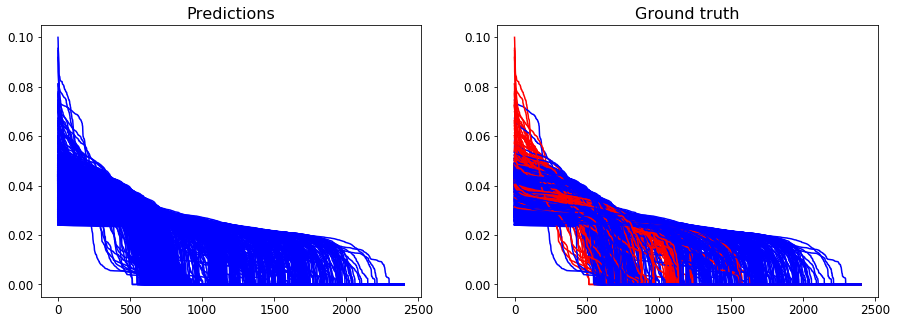

In [246]:
predict_colours = []
correct_colours = []
for i in range(m_test):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        correct_colours.append('red')
    else:
        correct_colours.append('blue')

plt.figure(figsize=(15,5))
for i in range(m_test):
#     if(i%20 ==0):
        plt.subplot(121)
        plt.plot(eig_test[i,:].T, color=predict_colours[i]);
        plt.title("Predictions", fontsize=16)

        plt.subplot(122)
        plt.plot(eig_test[i,:].T, color=correct_colours[i]);
        plt.title("Ground truth", fontsize=16)

In [247]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf,X_train, y_train, cv=3)

In [248]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[2862,  381],
       [  88,  439]])

In [249]:
from sklearn.metrics import precision_score, recall_score
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred),'\n')

from sklearn.metrics import f1_score
print('F1 score: \n',f1_score(y_train,y_train_pred))

Precision (% when positive prediction is correct):
 0.5353658536585366 

Recall (% of bad RO instances detected):
 0.8330170777988615 

F1 score: 
 0.651818856718634


In [250]:
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3,
                                 method="decision_function")

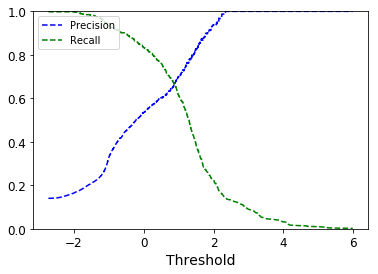

In [251]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

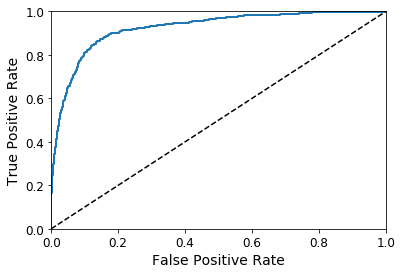

Area under ROC curve 0.9236083439970837


In [252]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

print('Area under ROC curve',roc_auc_score(y_train, y_scores))

In [225]:
y_train_pred_thresholding = (y_scores > -0.5)
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred_thresholding),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred_thresholding),'\n')

Precision (% when positive prediction is correct):
 0.37257939581719596 

Recall (% of bad RO instances detected):
 0.9127134724857685 

